<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Visualisation Principles

---

## LEARNING OBJECTIVES

### Core
- Create various plot types with `matplotlib`
    - Line plots (`plt.plot`)
    - Scatter plots (`plt.scatter`)
    - Histograms (`plt.hist`)
    - Bar plots (`plt.bar`)

### Target
- Create figure objects (`fig, ax = plt.subplots()`)
- Save figures to a file (`plt.savefig(file.pdf,format='pdf')`)

### Stretch
- Combine several plots into a single figure

## Lesson Guide

- [Why use Data Visualization?](#introduction)
- [Loading the data](#loading)
- [Line plot](#line)
- [Scatter plot](#scatter)
- [Histogram](#histogram)
- [Bar plot](#bar)
- [Pie chart](#pie)
- [Figure objects](#figure)
- [Additional resources](#resources)

<a name="introduction"></a>
## Why use data visualizations? 

Using charts or graphs to
visualize large amounts of complex data is easier than poring over spreadsheets or
reports. Data visualization is a quick, easy way to convey concepts in a universal
manner – and you can experiment with different scenarios by making slight adjustments.

Here we want to have a look at some common types of plots and how to produce them with matplotlib.

We import necessary packages like numpy for working with the data, and matplotlib and seaborn for plotting.

We choose a particular plotting style, set the font scale (for larger labels) and specify that we have a retina screen (for higher resolution, if you do not have one, the command will do nothing).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a name="loading"></a>
### Loading the data

We import two datasets, one is the sales data that you have already met, the other is related to admission statistics to graduate schools including the prestige of the undergraduate school and the GRE and GPA results of the students.

#### Sales data

In [2]:
data_sales = pd.read_csv('../../../../resource-datasets/sales_data_simple/sales.csv')
data_sales.head()

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.420760,93.802281,337166.53,337804.05
1,4.776510,21.082425,22351.86,21736.63
2,16.602401,93.612494,277764.46,306942.27
3,4.296111,16.824704,16805.11,9307.75
4,8.156023,35.011457,54411.42,58939.90


We extract the column values as numpy arrays.

In [3]:
volume = data_sales['volume_sold']  
margin = data_sales['2015_margin']
sales_2015 = data_sales['2015_q1_sales']
sales_2016 = data_sales['2016_q1_sales']

In [4]:
volume.shape

(200,)

#### Admissions data

In [5]:
data_admit = pd.read_csv('../../../../resource-datasets/admissions/admissions.csv')
data_admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [6]:
data_admit.shape

(400, 4)

In [7]:
data_admit.dropna(inplace=True)

In [8]:
data_admit.shape

(397, 4)

In [9]:
admit = data_admit['admit']  
gre = data_admit['gre'] 
gpa = data_admit['gpa'] 
prestige = data_admit['prestige']

Let's have a look at some common plots and how to make them with matplotlib.

## The anatomy of a figure

Matplotlib is a powerful library that builds highly customisable data visualisations.
Depending on the desired settings, use the relevant method to set the configuration.

<img src="https://matplotlib.org/_images/anatomy1.png">

For the list of functions available see [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

<a name="line"></a>
### Line plot

A line chart displays information by a series of data points connected by (usually) straight lines.

In [10]:
len(volume)

200

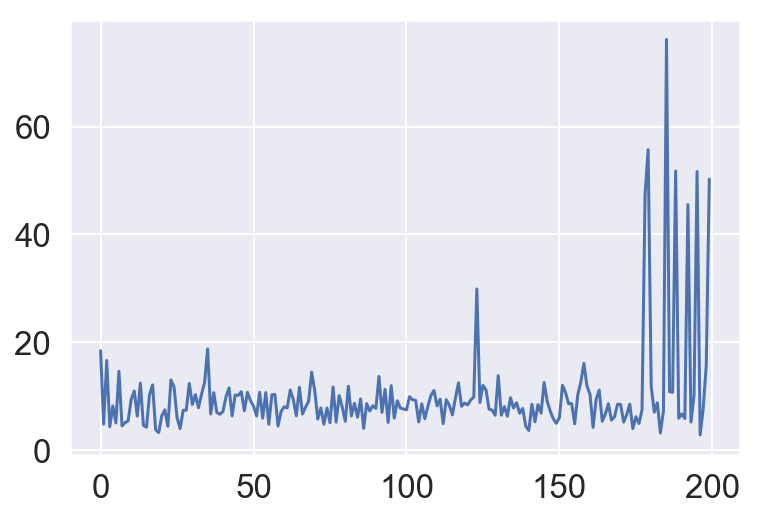

In [11]:
plt.plot(volume);

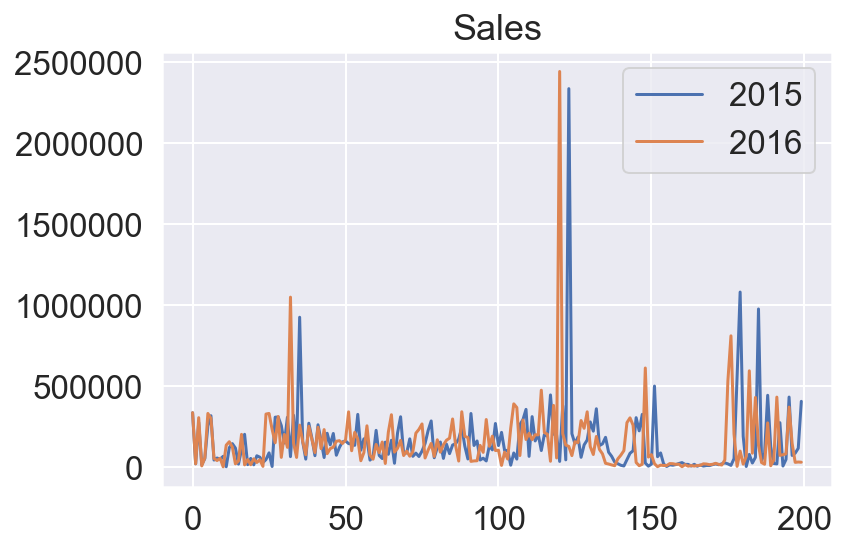

In [12]:
plt.plot(sales_2015, label=2015)
plt.plot(sales_2016, label=2016)
plt.legend()
plt.title('Sales')
plt.show()

> **Note**: If you put a semicolon after the plotting command or use the command `plt.show()` you can suppress printing out ugly junk about object creation.

<a name="scatter"></a>
### Scatter plot
Scatter plots are a great way to give you a sense of trends, concentrations
and outliers. This will give you a good idea of where you may want to investigate
further. 

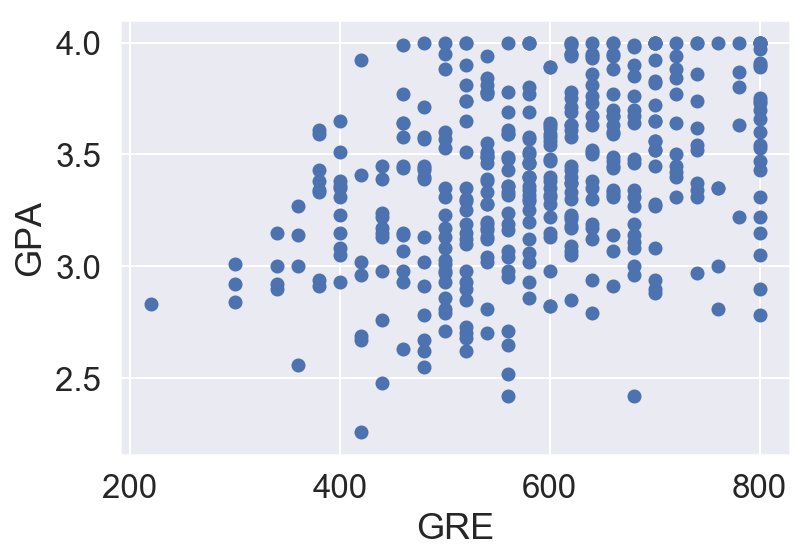

In [13]:
plt.scatter(gre, gpa)
plt.xlabel('GRE')
plt.ylabel('GPA')
plt.show()

<a name="histogram"></a>
### Histogram 

Histograms are useful to depict the distribution of continuous data. 


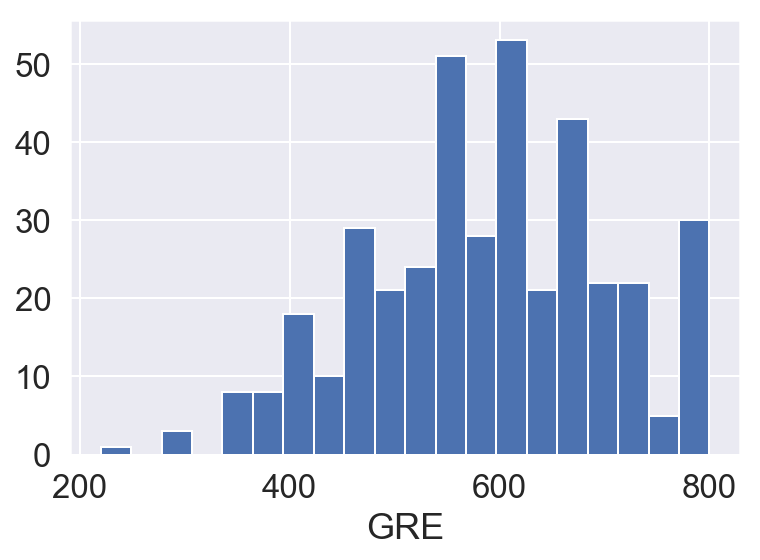

In [14]:
plt.hist(gre, bins=20)
plt.xlabel('GRE')
plt.show()

<a name="bar"></a>
### Bar plot

Bar charts are one of the most common ways to visualize data. Why? Because it's easy
and straightforward for the eye to compare information. Bar charts are
most effective when you have numerical data that splits neatly into different
categories.

In [15]:
# First calculate the mean for each prestige level
admissions_per_prestige = [admit[prestige == i].mean() for i in range(1, 5)]
admissions_per_prestige

[0.5409836065573771,
 0.3581081081081081,
 0.23140495867768596,
 0.1791044776119403]

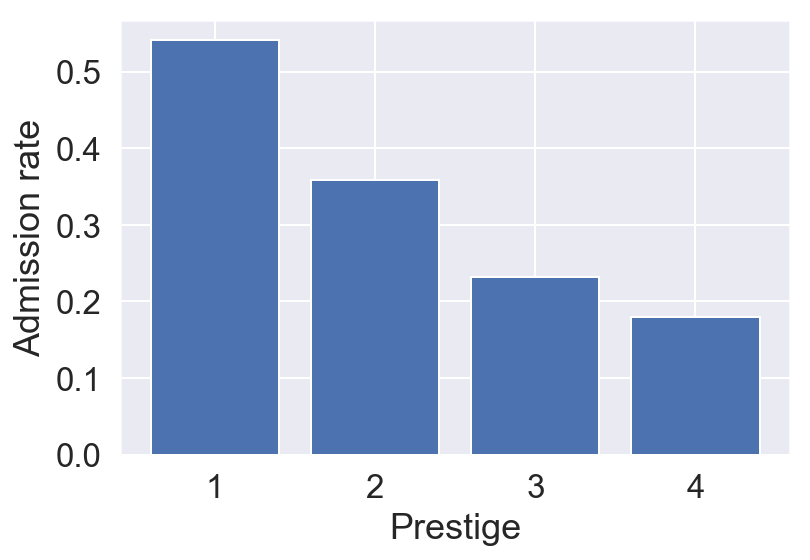

In [16]:
plt.bar(range(1, 5), admissions_per_prestige)
plt.xlabel('Prestige')
plt.ylabel('Admission rate')
plt.show()

<a name="pie"></a>
### Pie chart

Pie charts are to be discouraged in general. The only time that pie charts should be used is to show relative proportions
or percentages of information. If you want to compare data, leave it to bars or stacked bars. If your viewer
has to work to translate pie wedges into relevant data or compare pie charts, key points
you might be trying to convey may be missed. This is because of the way the eye will 
improperly perceive the relative sizes of the wedges. An alternative are doughnut charts,
but these are still problematic.

[0.15365239294710328, 0.37279596977329976, 0.3047858942065491, 0.16876574307304787]
['prestige_1 = 15%', 'prestige_2 = 37%', 'prestige_3 = 30%', 'prestige_4 = 17%']


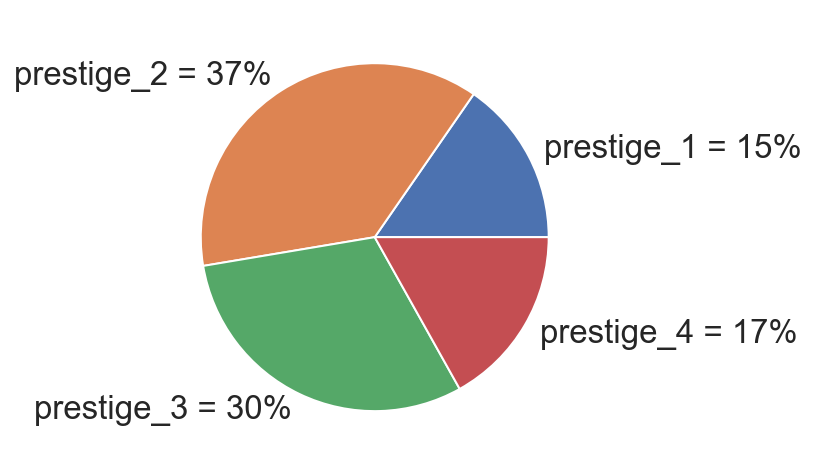

In [17]:
# Calculate the % of each prestige
prestige_fraction = [len(admit[prestige == i])/len(admit) for i in range(1, 5)]
print(prestige_fraction)

# Prepare a list with labels
label_list = ['prestige_{} = {}%'.format(i, round(prestige_fraction[i-1] * 100) ) for i in range(1, 5)]
print(label_list)

plt.pie(prestige_fraction, labels=label_list)
plt.show()

<a name="figure"></a>
### Figure objects

You can perfectly create figures as above. If you want to change the figure, you simply add some code and run the cell again.

This is impractical if you have figures which take a long time to create or if you are not working in the jupyter notebook environment where your figures are directly displayed. 

It is therefore useful to assign the objects that matplotlib produces when creating a plot to variables which you can refer to later. There are usually two objects. One is the figure object, conventionally referred to as `ax`, and another is the figure of the plot itself referred to as `fig`. These objects you can call or modify at a later stage.

For a list of ax methods see [here](https://matplotlib.org/3.1.1/api/axes_api.html#matplotlib.axes.Axes).

You will see that structure frequently in the lessons.

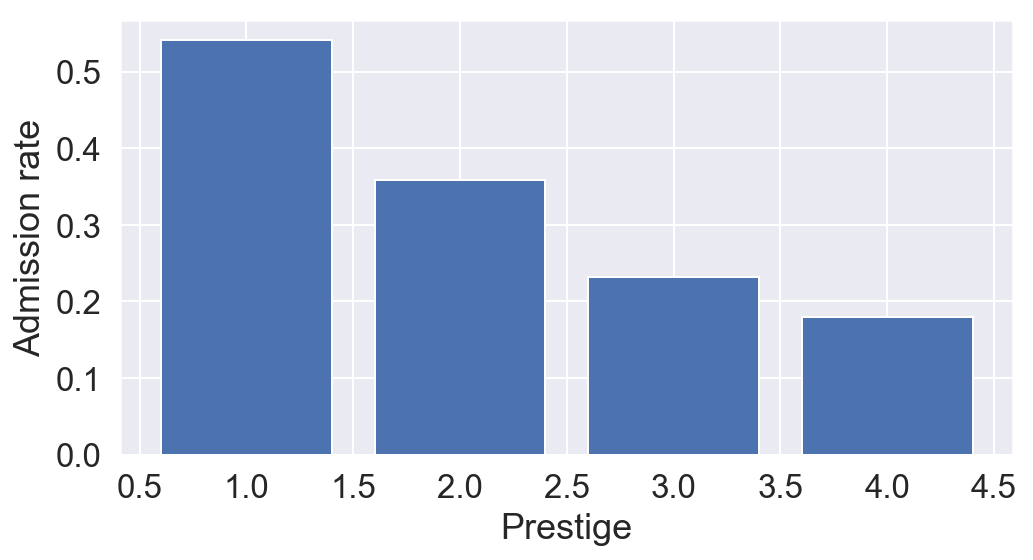

In [18]:
# Create the figure output object
fig = plt.figure(figsize=(8, 4))

# Obtain the object for producing the figure, gca stands for get current axis
ax = fig.gca()

ax.bar(range(1, 5), admissions_per_prestige)
ax.set_xlabel('Prestige')
ax.set_ylabel('Admission rate')

plt.show()

You can call these objects.

In [19]:
ax

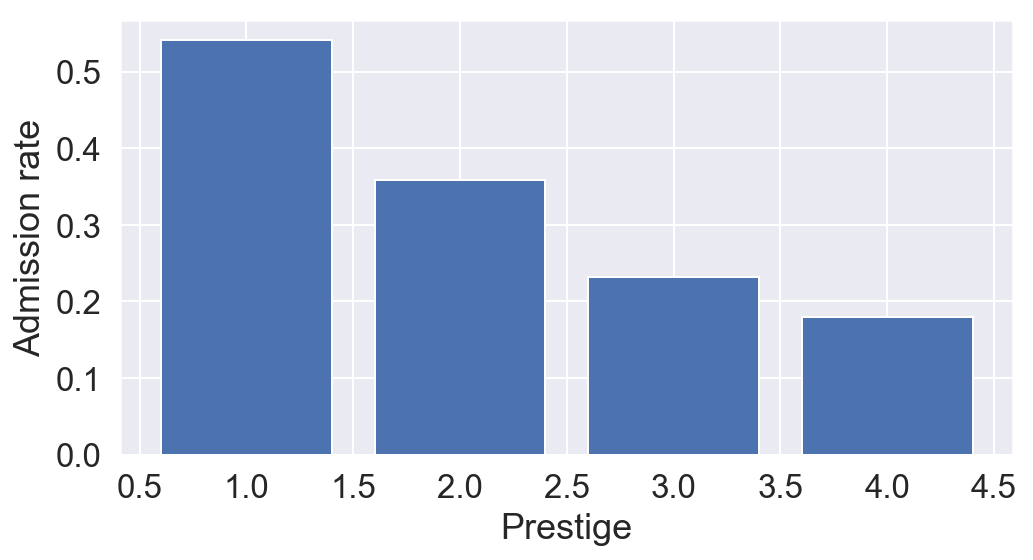

In [20]:
fig

In [21]:
# Change the settings for fig
ax.set_title('Admission rates per prestige');

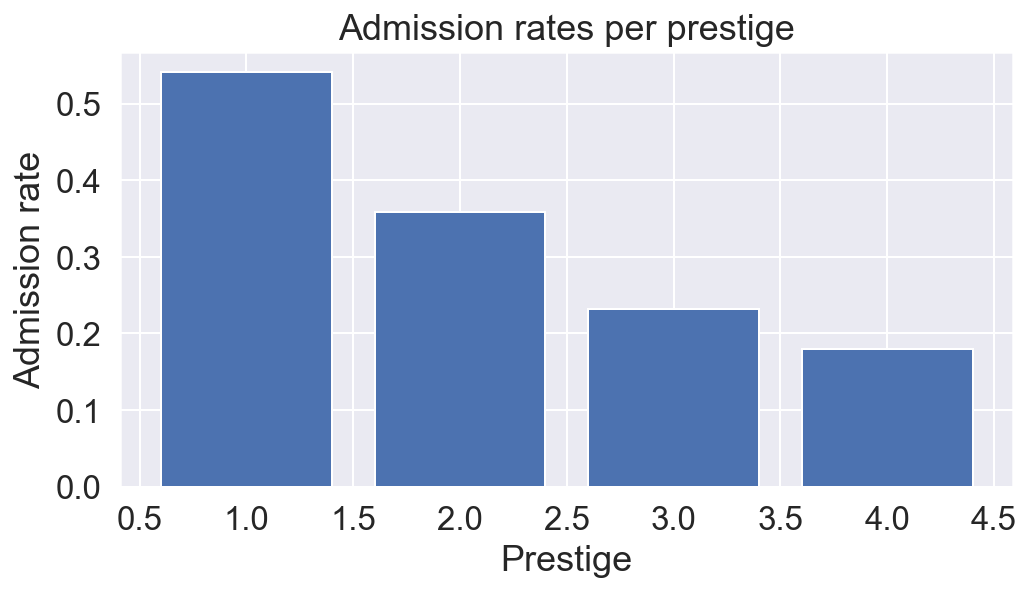

In [22]:
# Render fig as and when needed with all the ax configuration embedded
fig

An alternative way to directly create both objects is the following producing exactly the same output.

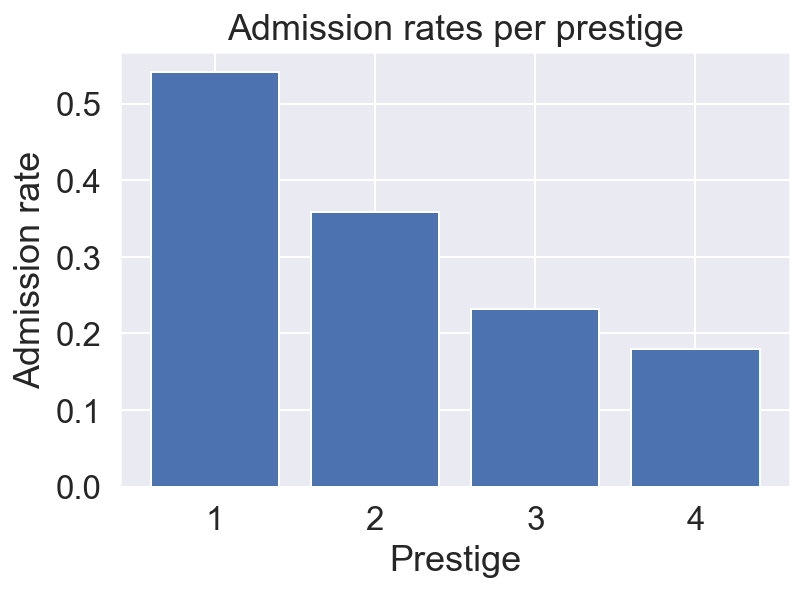

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(1, 5), admissions_per_prestige)
ax.set_xlabel('Prestige')
ax.set_ylabel('Admission rate')
ax.set_title('Admission rates per prestige')
plt.show()

We can easily combine several graphs into a single object. Note the numpy style of indexing.

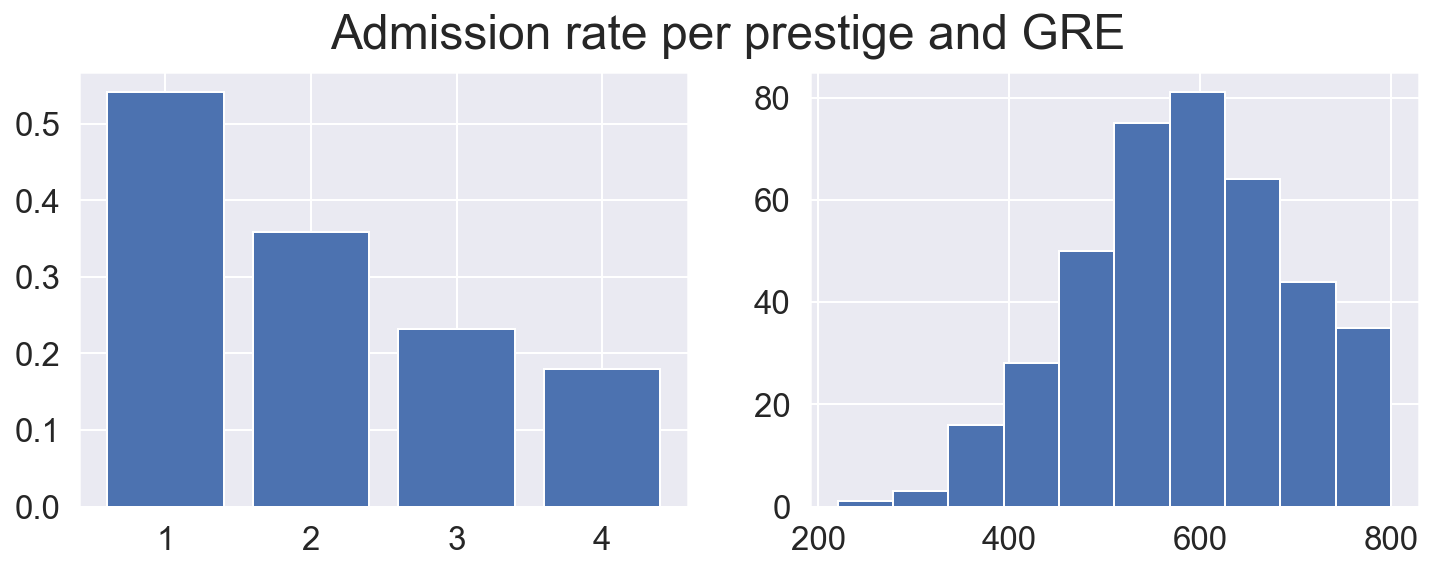

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].bar(range(1, 5), admissions_per_prestige)
ax[1].hist(gre)
fig.suptitle('Admission rate per prestige and GRE', fontsize=24)
plt.show()

We could even combine matplotlib and seaborn figures. Notice how the axis object is indicated in the seaborn plot. You will see at a later stage that pandas uses a similar structure for referring to plot objects.

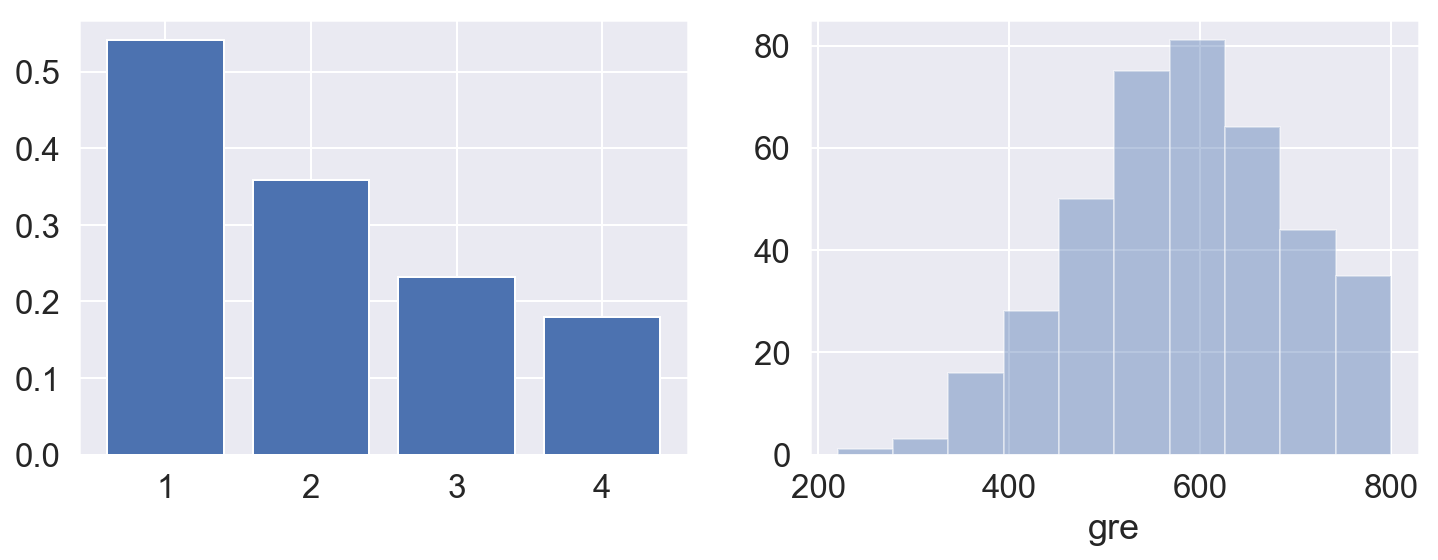

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].bar(range(1, 5), admissions_per_prestige)
sns.distplot(gre, bins=10, kde=False, ax=ax[1])
plt.show()

### Saving a figure

Refer to the figure object and indicate the filename and desired format. 

In [26]:
fig.savefig('figure.pdf', format='pdf')

<a name="resources"></a>
### Additional resources

Take a look at the matplotlib and seaborn documentation for some inspiration. Tableau and D3 also have good resources on its website.

Click here for more:

[Matplotlib gallery](http://matplotlib.org/gallery/index.html)

[Seaborn gallery](http://seaborn.pydata.org/examples/index.html)

[Tableau charts and graphs](https://drive.google.com/file/d/0Bx2SHQGVqWasT1l4NWtLclJJcWM/view)

[D3 gallery](https://github.com/mbostock/d3/wiki/Gallery)

### Independent practice



#### 1) Add axis labels and titles to the last figure.

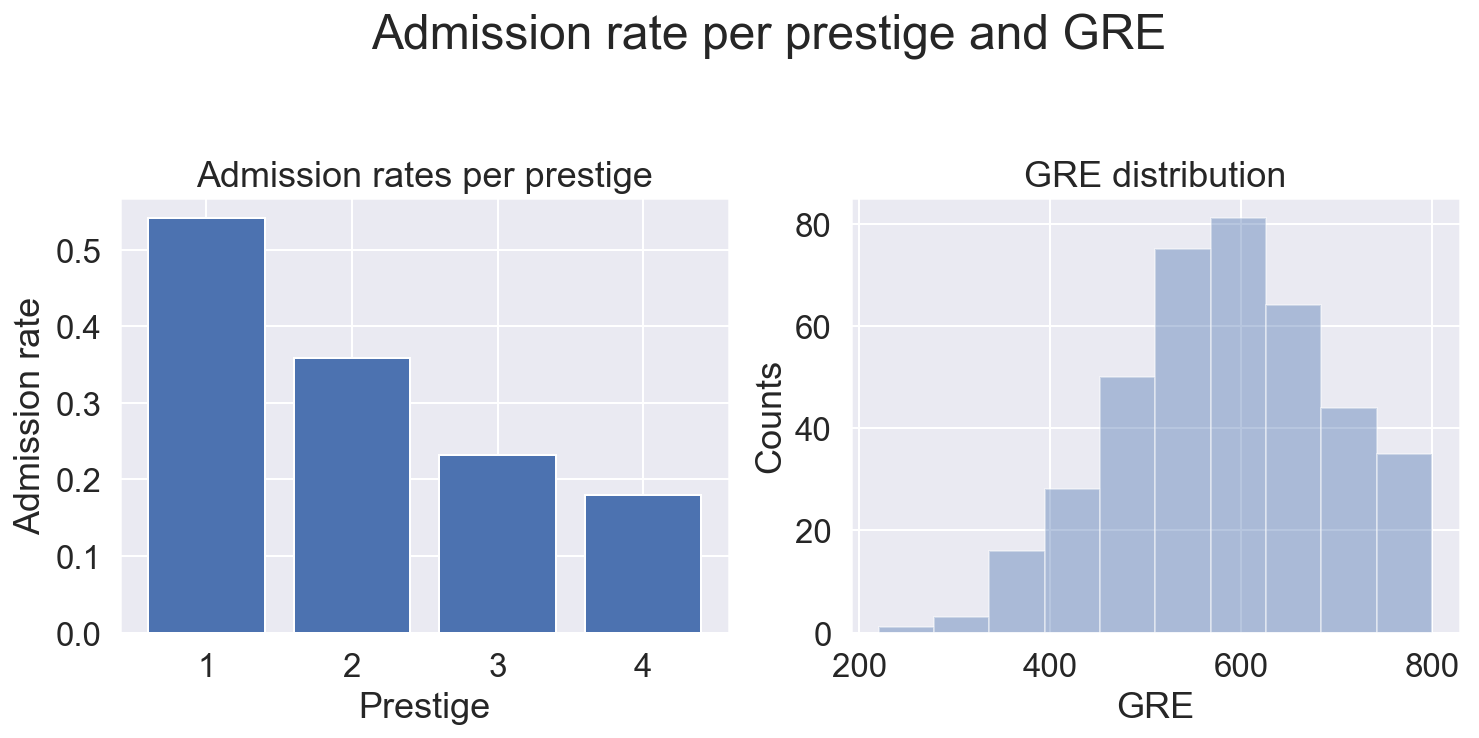

In [27]:
ax[0].set_xlabel('Prestige')
ax[0].set_ylabel('Admission rate')
ax[0].set_title('Admission rates per prestige')
ax[1].set_xlabel('GRE')
ax[1].set_ylabel('Counts')
ax[1].set_title('GRE distribution')
fig.suptitle('Admission rate per prestige and GRE', y=1.2, fontsize=24)


fig

#### 2) Rearrange the figure so that the two plots are on top of each other.

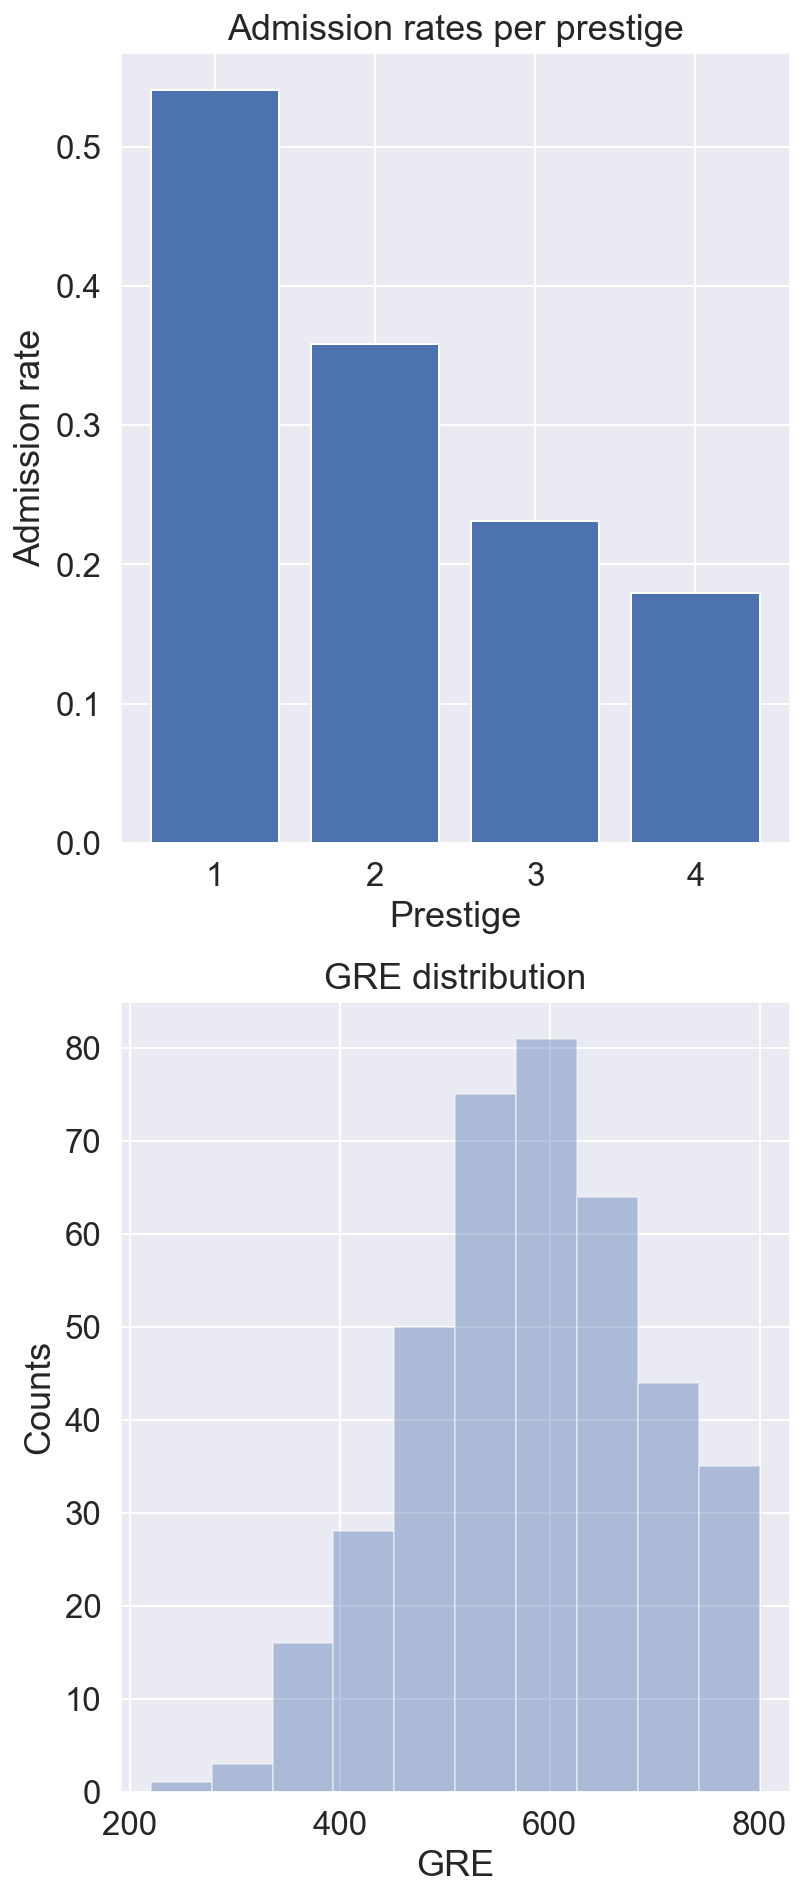

In [28]:
fig, ax = plt.subplots(nrows=2, figsize=(6, 16))
ax[0].bar(range(1, 5), admissions_per_prestige)
sns.distplot(gre, bins=10, kde=False, ax=ax[1])
ax[0].set_xlabel('Prestige')
ax[0].set_ylabel('Admission rate')
ax[0].set_title('Admission rates per prestige')
ax[1].set_xlabel('GRE')
ax[1].set_ylabel('Counts')
ax[1].set_title('GRE distribution')

plt.show()

#### 3) Create a figure with four plots, two in each row.

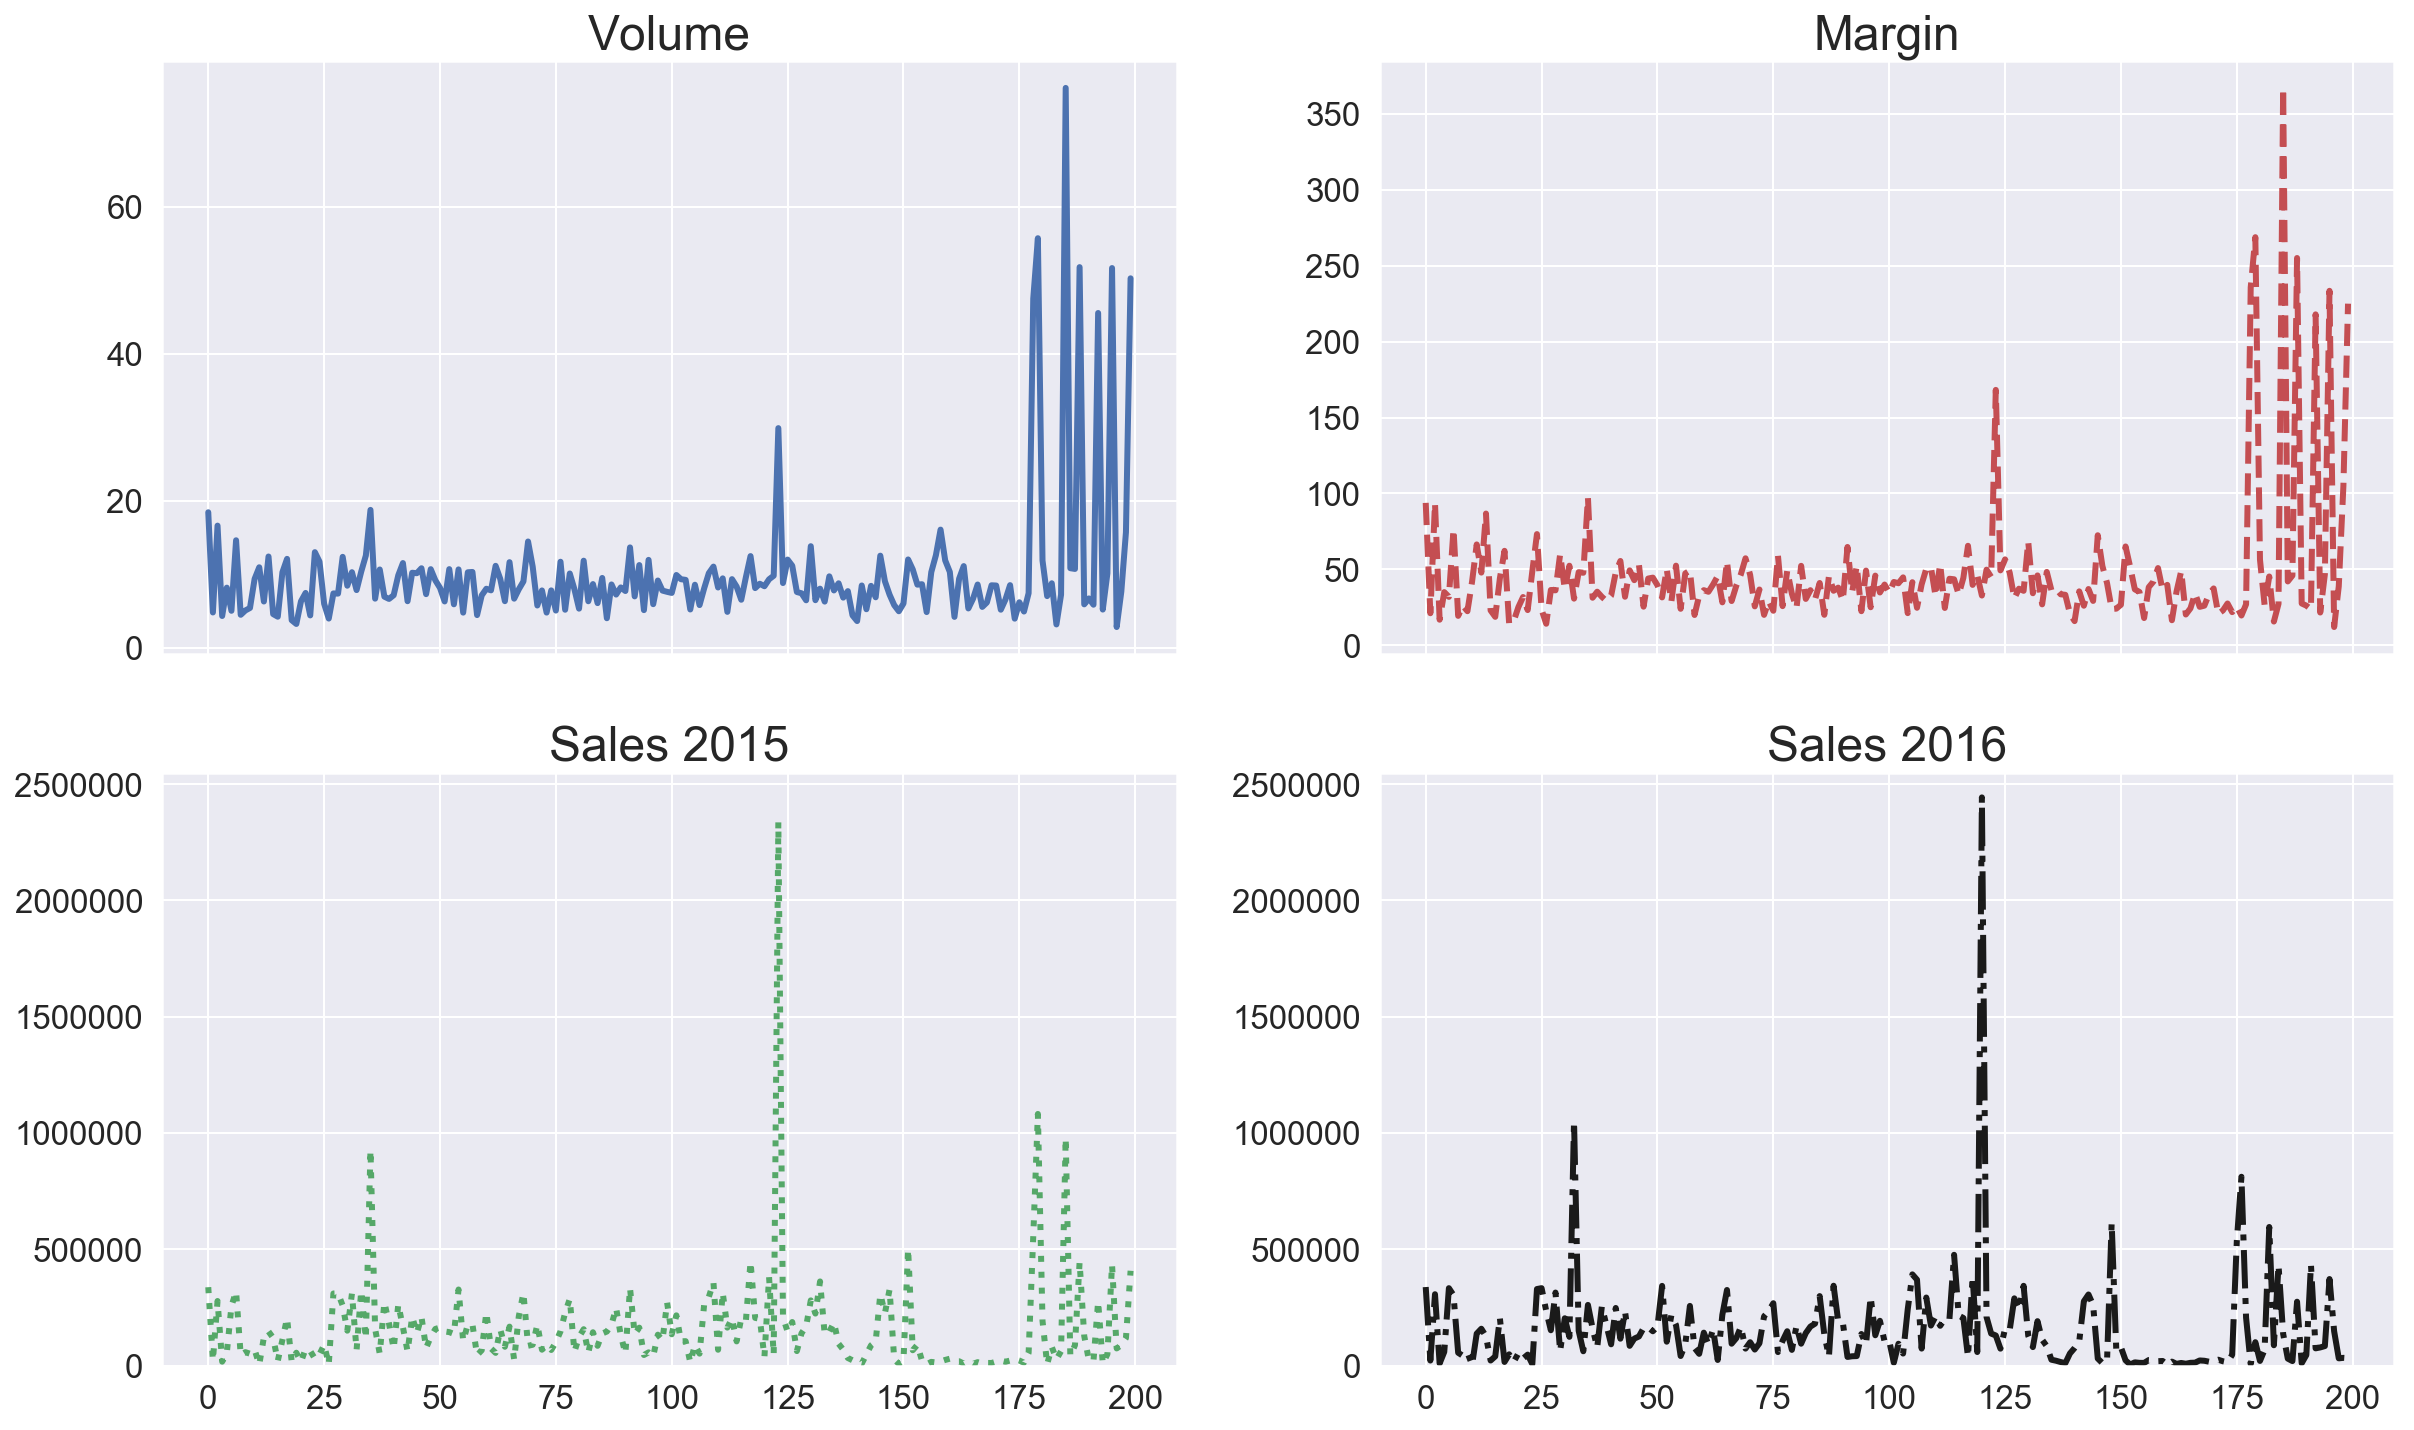

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 12), sharex=True)

ax[0, 0].plot(volume, 'b', lw=3)
ax[0, 1].plot(margin, color='r', lw=3, linestyle='--')
ax[1, 0].plot(sales_2015,  color='g', lw=3, linestyle=':')
ax[1, 1].plot(sales_2016, color='k', lw=3, linestyle='-.')

ax[0, 0].set_title('Volume', fontsize=24)
ax[0, 1].set_title('Margin', fontsize=24)
ax[1, 0].set_title('Sales 2015', fontsize=24)
ax[1, 1].set_title('Sales 2016', fontsize=24)
ax[1, 0].set_ylim([0, 2550000])
ax[1, 1].set_ylim([0, 2550000])

plt.show()

#### 4) Produce a histogram of GPA and experiment with the number of bins.

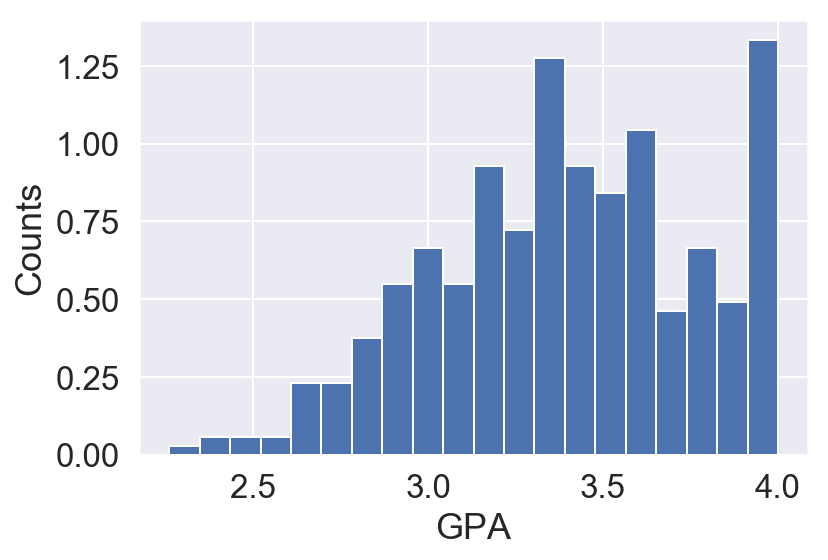

In [30]:
plt.hist(gpa, bins=20, density=True)
plt.xlabel('GPA')
plt.ylabel('Counts')
plt.show()

#### 5) Find out about setting colors, line width and line styles.

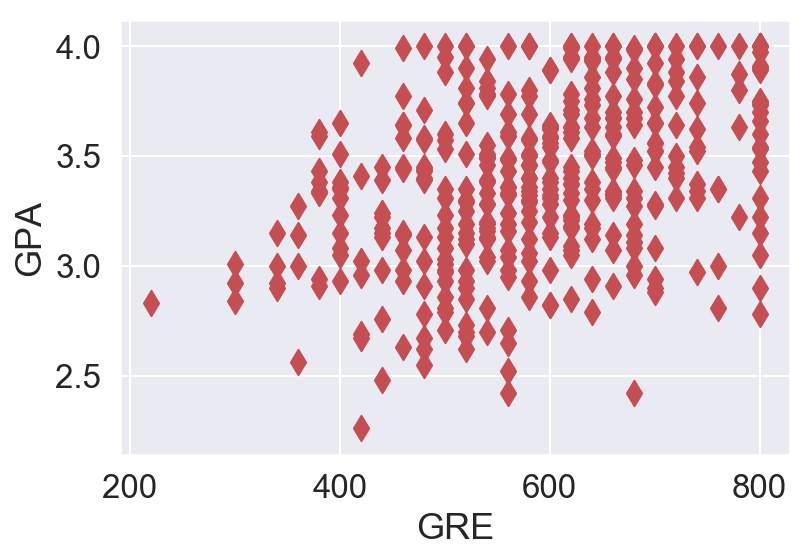

In [31]:
plt.scatter(gre, gpa, c='r', marker='d', s=80)
plt.xlabel('GRE')
plt.ylabel('GPA')
plt.show()